In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
h = 6.626e-34  
c = 3.0e8      
k = 1.38e-23   

In [3]:
def planck(frecuencia, temperatura):
    densidad_e = (8 * np.pi * h * frecuencia**3) / (c**3) / (np.exp(h * frecuencia / (k * temperatura)) - 1)
    return densidad_e

def rayleigh_jeans(frecuencia, temperatura):
    densidad_e = (8 * np.pi * frecuencia**2 * k * temperatura) / (c**3)
    return densidad_e

def wien(frecuencia, temperatura):
    densidad_e = (8 * np.pi * h * frecuencia**3)  / (c**3) * np.exp(-h*frecuencia / (k * temperatura))
    return densidad_e

<ipython-input-3-7247883f1bb3>:2: RuntimeWarning: overflow encountered in exp
  densidad_e = (8 * np.pi * h * frecuencia**3) / (c**3) / (np.exp(h * frecuencia / (k * temperatura)) - 1)
<ipython-input-3-7247883f1bb3>:2: RuntimeWarning: overflow encountered in exp
  densidad_e = (8 * np.pi * h * frecuencia**3) / (c**3) / (np.exp(h * frecuencia / (k * temperatura)) - 1)
<ipython-input-3-7247883f1bb3>:2: RuntimeWarning: overflow encountered in exp
  densidad_e = (8 * np.pi * h * frecuencia**3) / (c**3) / (np.exp(h * frecuencia / (k * temperatura)) - 1)
<ipython-input-3-7247883f1bb3>:2: RuntimeWarning: overflow encountered in exp
  densidad_e = (8 * np.pi * h * frecuencia**3) / (c**3) / (np.exp(h * frecuencia / (k * temperatura)) - 1)


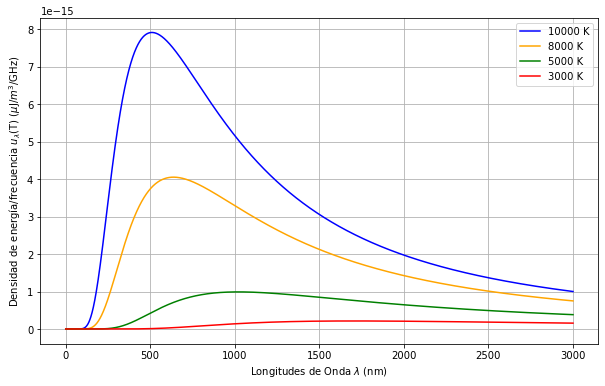

In [4]:
# literal a

colors = ['blue', 'orange', 'green', 'red']

plt.figure(figsize=(10, 6))

longitudes_onda = np.linspace(1e-9, 3e-6, int(1e5))
frecuencia = c / longitudes_onda
temperaturas = [10000, 8000, 5000, 3000]

for i, temperatura in enumerate(temperaturas):
    densidades_energia = planck(frecuencia, temperatura)
    plt.plot(longitudes_onda * 1e9, densidades_energia, color=colors[i], label=f'{temperatura} K')

plt.xlabel(r'Longitudes de Onda $\lambda$ (nm)')
plt.ylabel(r'Densidad de energía/frecuencia $u_\lambda$(T) ($\mu$J/$m^3$/GHz)')
plt.legend()
plt.grid()
plt.show()

In [5]:
# literal b

for i, temperatura in enumerate(temperaturas):
    densidades_energia = planck(frecuencia, temperatura)
    longitud_pico = longitudes_onda[np.argmax(densidades_energia)]
    print(f"Temperatura: {temperatura} K, Longitud de onda del pico: {longitud_pico*1e9} nm")

Temperatura: 10000 K, Longitud de onda del pico: 510.5351953519534 nm
Temperatura: 8000 K, Longitud de onda del pico: 638.1739117391173 nm
Temperatura: 5000 K, Longitud de onda del pico: 1021.0600706007061 nm
Temperatura: 3000 K, Longitud de onda del pico: 1701.779897798978 nm


<ipython-input-3-7247883f1bb3>:2: RuntimeWarning: overflow encountered in exp
  densidad_e = (8 * np.pi * h * frecuencia**3) / (c**3) / (np.exp(h * frecuencia / (k * temperatura)) - 1)


<ipython-input-3-7247883f1bb3>:2: RuntimeWarning: invalid value encountered in true_divide
  densidad_e = (8 * np.pi * h * frecuencia**3) / (c**3) / (np.exp(h * frecuencia / (k * temperatura)) - 1)


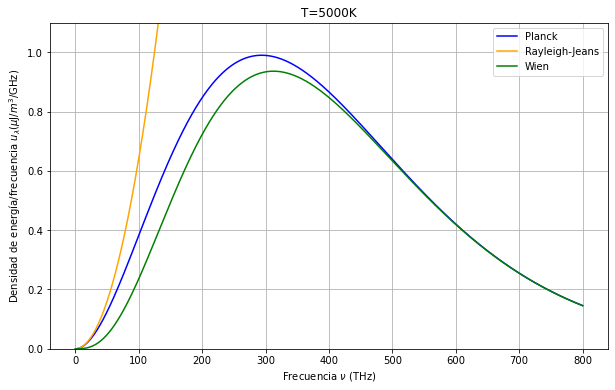

In [6]:
# literal c

frecuencias = np.linspace(0, 800e12, int(1e4))
temperatura = 5000

densidades_planck = planck(frecuencias, temperatura)   
densidades_rj = rayleigh_jeans(frecuencias, temperatura)
densidades_wien = wien(frecuencias, temperatura) 

# Pasar a las unidades de la gráfica
frecuencias /= 1e12
densidades_planck *= 1e15
densidades_rj *= 1e15
densidades_wien *= 1e15

plt.figure(figsize=(10, 6))
plt.plot(frecuencias, densidades_planck, color='blue', label='Planck')
plt.plot(frecuencias, densidades_rj, label='Rayleigh-Jeans', color='orange')
plt.plot(frecuencias, densidades_wien, label='Wien', color='green')

plt.title(f'T={temperatura}K')
plt.xlabel(r'Frecuencia $\nu$ (THz)')
plt.ylabel(r'Densidad de energía/frecuencia $u_\lambda$($\mu$J/$m^3$/GHz)')
plt.legend()
plt.ylim(0, 1.1)
plt.grid()
plt.show()

In [7]:
#Concordancia

concordancia_rj = densidades_planck - densidades_rj
concordancia_w = densidades_planck - densidades_wien

In [8]:
print(f"La diferencia entre las densidades de energía según las ecuaciones de Planck y de Wien: {concordancia_w} muestra que para frecuencias pequeñas se tiene una concordancia relativamente pequeña (las diferencias es del orden de e-07), mientras que los últimos valores tienen una concordancia bastante buena (la diferencia entre las densidades es muy baja).")

La diferencia entre las densidades de energía según las ecuaciones de Planck y de Wien: [           nan 4.10668606e-07 1.64078227e-06 ... 6.72813519e-05
 6.71981833e-05 6.71151154e-05] muestra que para frecuencias pequeñas se tiene una concordancia relativamente pequeña (las diferencias es del orden de e-07), mientras que los últimos valores tienen una concordancia bastante buena (la diferencia entre las densidades es muy baja).


In [9]:
print(f"La diferencia entre las densidades de energía según las ecuaciones de Planck y de Rayleight-Jeans: {concordancia_rj} muestra que para frecuencias pequeñas se tiene una alta concordancia (la diferencia es del orden de e-10), mientras que los últimos valores tienen una concordancia mucho menor (la diferencia entre las densidades es muy alta). Esto es lo esperado para la catástrofe universal.")

La diferencia entre las densidades de energía según las ecuaciones de Planck y de Rayleight-Jeans: [            nan -1.57921831e-10 -1.26321285e-09 ... -4.09437996e+01
 -4.09520887e+01 -4.09603786e+01] muestra que para frecuencias pequeñas se tiene una alta concordancia (la diferencia es del orden de e-10), mientras que los últimos valores tienen una concordancia mucho menor (la diferencia entre las densidades es muy alta). Esto es lo esperado para la catástrofe universal.
